# Sensitivity analysis for Bayesian networks using credal networks

| | | |
|-|-|-|
|[ ![Creative Commons License](images/cc4.png)](http://creativecommons.org/licenses/by-nc/4.0/) |[ ![aGrUM](images/logoAgrum.png)](https://agrum.org) |[ ![interactive online version](images/atbinder.svg)](https://agrum.gitlab.io/extra/agrum_at_binder.html)

There are several sensitivity analysis frameworks for Bayesian networks. A fairly efficient method is certainly to use credal networks to do this analysis.

## Creating a Bayesian network

In [1]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

In [2]:
bn=gum.fastBN("A->B->C<-D->E->F<-B")
gnb.flow.row(bn,gnb.getInference(bn))

## Building a credal network from a BN

It is easy to build a credal network from a Bayesian network by indicating the 'noise' on each parameter.

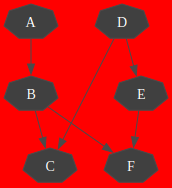

In [3]:
cr=gum.CredalNet(bn,bn)
gnb.show(cr)

In [4]:
cr.bnToCredal(beta=1e-10,oneNet=False)
cr.computeBinaryCPTMinMax()
print(cr)


A:Range([0,1])
<> : [[0.433078 , 0.566922] , [0.432826 , 0.567174]]

B:Range([0,1])
<A:0> : [[0.833763 , 0.166236]]
<A:1> : [[0.693796 , 0.306204] , [0.693791 , 0.306209]]

C:Range([0,1])
<B:0|D:0> : [[0.915639 , 0.084361] , [0.000326082 , 0.999674]]
<B:1|D:0> : [[0.22372 , 0.77628] , [0.212396 , 0.787604]]
<B:0|D:1> : [[0.182952 , 0.817048] , [0.139206 , 0.860794]]
<B:1|D:1> : [[0.470174 , 0.529826] , [0.470034 , 0.529966]]

D:Range([0,1])
<> : [[0.608687 , 0.391313] , [0.608669 , 0.391331]]

E:Range([0,1])
<D:0> : [[0.264115 , 0.735885] , [0.259278 , 0.740722]]
<D:1> : [[0.791676 , 0.208324] , [0.791674 , 0.208326]]

F:Range([0,1])
<E:0|B:0> : [[0.637407 , 0.362593] , [0.637396 , 0.362604]]
<E:1|B:0> : [[0.401509 , 0.598491] , [0.401086 , 0.598914]]
<E:0|B:1> : [[0.183176 , 0.816824] , [0.116378 , 0.883622]]
<E:1|B:1> : [[0.36295 , 0.63705] , [0.362142 , 0.637858]]




## Testing difference hypothesis about the global precision on the parameters

We can therefore easily conduct a sensitivity analysis based on an assumption of error on all the parameters of the network.

In [5]:
def showNoisy(bn,beta):
  cr=gum.CredalNet(bn,bn)
  cr.bnToCredal(beta=beta,oneNet=False)
  cr.computeBinaryCPTMinMax()
  ielbp=gum.CNLoopyPropagation(cr)  
  return gnb.getInference(cr,engine=ielbp)

In [6]:
for eps in [1,1e-3,1e-5,1e-8,1e-10]:
  gnb.flow.add(showNoisy(bn,eps),caption=f"noise={eps}")
gnb.flow.display()

AttributeError: 'CNLoopyPropagation' object has no attribute 'setEvidence'